In [1]:
#!pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [37]:
precipStations =  pd.read_excel('WeatherData2020.xlsx',index_col=0,parse_dates=True)
precipStations.head()

,Est1,Est2,Est3
Date/Time,,,
2020-01-01,0.0,2.0,8.2
2020-01-02,NaN,0.0,1.5
2020-01-03,NaN,0.0,0.0
2020-01-04,NaN,0.0,0.7
2020-01-05,NaN,0.0,0.4


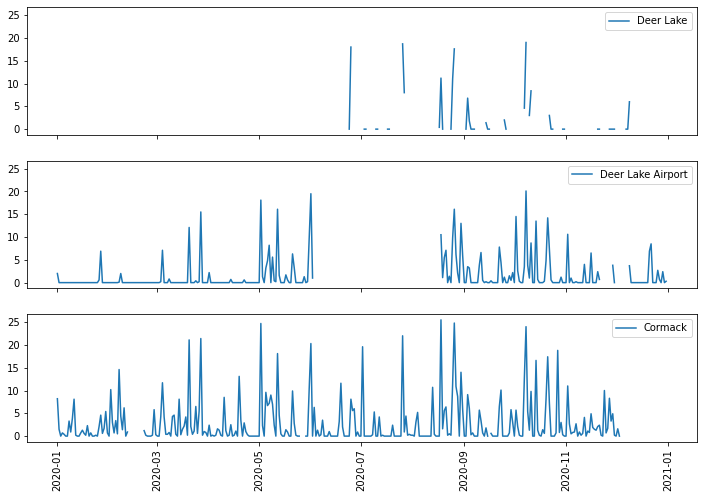

In [59]:
fig, axs=plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(precipStations.index,precipStations['Est1'],label='Deer Lake')
axs[0].legend()
axs[1].plot(precipStations.index,precipStations['Est2'],label='Deer Lake Airport')
axs[1].legend()
axs[2].plot(precipStations.index,precipStations['Est3'],label='Cormack')
axs[2].legend()
plt.xticks(rotation='vertical')
plt.show()

In [39]:
precipNotNan = precipStations.dropna()
precipNotNan

,Est1,Est2,Est3
Date/Time,,,
2020-01-01,0.0,2.0,8.2
2020-01-10,0.0,0.0,3.9
2020-01-20,0.4,0.0,0.0
2020-02-29,0.0,0.0,0.3
2020-08-18,11.2,10.5,25.5
2020-08-19,0.0,1.1,1.6
2020-08-24,0.0,0.0,0.2
2020-08-25,11.0,9.8,11.5
2020-08-26,17.6,16.1,24.8


In [40]:
xTrain = precipNotNan[['Est1','Est3']]
yTrain = precipNotNan[['Est2']].values.flatten()

In [41]:
print(xTrain[:10])
print(yTrain[:10])

            Est1  Est3
Date/Time             
2020-01-01   0.0   8.2
2020-01-10   0.0   3.9
2020-01-20   0.4   0.0
2020-02-29   0.0   0.3
2020-08-18  11.2  25.5
2020-08-19   0.0   1.6
2020-08-24   0.0   0.2
2020-08-25  11.0  11.5
2020-08-26  17.6  24.8
2020-08-28   2.8   8.7
[ 2.   0.   0.   0.  10.5  1.1  0.   9.8 16.1  2.1]


In [42]:
scaler = StandardScaler().fit(xTrain.values)

In [43]:
xTrainScaled = scaler.transform(xTrain.values)

In [44]:
print(xTrainScaled[:10])

[[-0.56329449  0.39955421]
 [-0.56329449 -0.2019291 ]
 [-0.48055067 -0.74746049]
 [-0.56329449 -0.70549654]
 [ 1.75353256  2.81947548]
 [-0.56329449 -0.52365274]
 [-0.56329449 -0.71948452]
 [ 1.71216065  0.86115769]
 [ 3.07743373  2.72155959]
 [ 0.01591227  0.46949414]]


In [45]:
#check scaler
print(xTrainScaled.mean(axis=0))
print(xTrainScaled.std(axis=0))

[-1.70803542e-17 -9.96353996e-17]
[1. 1.]


In [46]:
#regressor
regr = MLPRegressor(random_state=1, max_iter=5000).fit(xTrainScaled, yTrain)

In [47]:
#test
xTest = precipStations[['Est1','Est3']].dropna()
xTestScaled = scaler.transform(xTest.values)

In [48]:
print(xTest.describe())
print(xTestScaled[:10])

            Est1       Est3
count  55.000000  55.000000
mean    2.914545   4.676364
std     5.361468   6.899140
min     0.000000   0.000000
25%     0.000000   0.000000
50%     0.000000   0.900000
75%     3.000000   8.150000
max    19.000000  25.500000
[[-0.56329449  0.39955421]
 [-0.56329449 -0.2019291 ]
 [-0.48055067 -0.74746049]
 [-0.56329449 -0.70549654]
 [-0.56329449 -0.74746049]
 [ 3.16017755  0.38556623]
 [ 1.29844153  0.09181856]
 [-0.56329449 -0.74746049]
 [-0.56329449 -0.74746049]
 [-0.56329449 -0.74746049]]


In [49]:
#regression
yPredict = regr.predict(xTestScaled)
print(yPredict[:10])

[ 2.38272371e+00  1.40350897e+00  7.85468117e-02  1.05206629e-01
 -7.23704743e-03  1.90852141e+01  1.23494589e+01 -7.23704743e-03
 -7.23704743e-03 -7.23704743e-03]


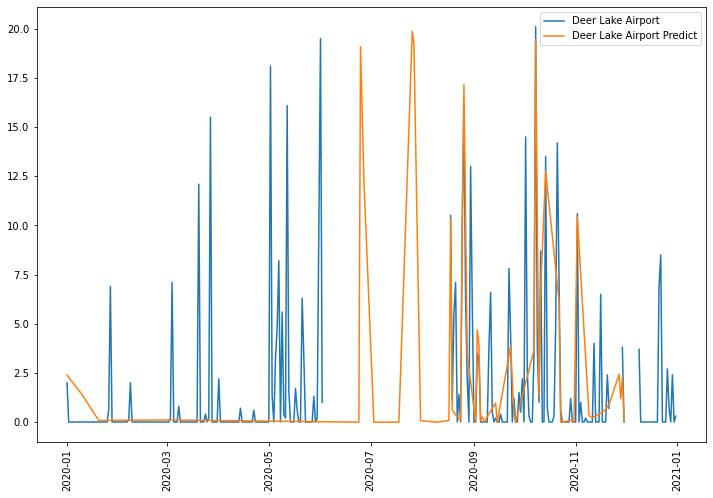

In [60]:
#comparison of station 2
fig, ax=plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(precipStations.index,precipStations['Est2'],label='Deer Lake Airport')
ax.plot(xTest.index,yPredict,label='Deer Lake Airport Predict')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [61]:
#insert predicted values
precipStations.head(10)

,Est1,Est2,Est3,Est2Completed
Date/Time,,,,
2020-01-01,0.0,2.0,8.2,2.0
2020-01-02,NaN,0.0,1.5,0.0
2020-01-03,NaN,0.0,0.0,0.0
2020-01-04,NaN,0.0,0.7,0.0
2020-01-05,NaN,0.0,0.4,0.0
2020-01-06,NaN,0.0,0.0,0.0
2020-01-07,NaN,0.0,0.0,0.0
2020-01-08,NaN,0.0,3.3,0.0
2020-01-09,NaN,0.0,0.9,0.0


In [62]:
#create new column
precipStations['Est2Completed'] = 0

In [63]:
#fill the new column with original and predicted values for Est2
for index, row in precipStations.iterrows():
    if np.isnan(row['Est2']) and ~np.isnan(row['Est1']) and ~np.isnan(row['Est3']):
        rowScaled = scaler.transform([[row['Est1'],row['Est3']]])
        precipStations.loc[index,['Est2Completed']] = regr.predict(rowScaled)
    elif ~np.isnan(row['Est2']):
        precipStations.loc[index,['Est2Completed']] = row['Est2']
    else:
        row['Est2Completed'] = np.nan

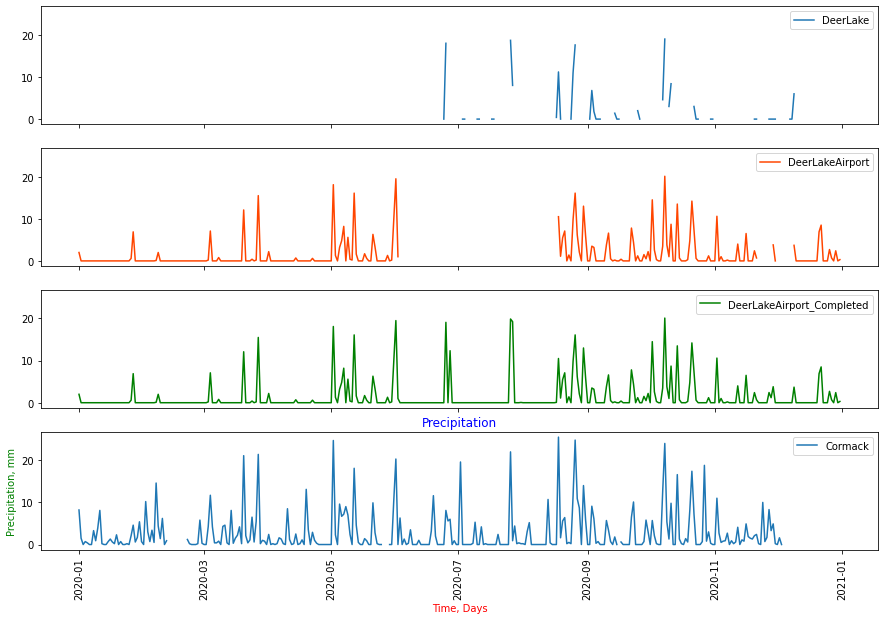

In [75]:
#show original and filled values
fig, axs=plt.subplots(4,1,figsize=(15,10),sharex=True,sharey=True)

plt.title('Precipitation', color='blue')
plt.xlabel('Time, Days',color='red')
plt.ylabel('Precipitation, mm', color='green')

axs[0].plot(precipStations.index,precipStations['Est1'],label='DeerLake')
axs[0].legend()
axs[1].plot(precipStations.index,precipStations['Est2'],label='DeerLakeAirport',color='orangered')
axs[1].legend()
axs[2].plot(precipStations.index,precipStations['Est2Completed'],label='DeerLakeAirport_Completed',color='Green')
axs[2].legend()
axs[3].plot(precipStations.index,precipStations['Est3'],label='Cormack')
axs[3].legend()
plt.xticks(rotation='vertical')
plt.savefig('Precipitation.pdf')
plt.show()

